## Como gerar uma série temporal de $ET_o$ usando o Gera_Serie_Eto.py

In [1]:
import Gera_Serie_Eto as gse
import pandas as pd
import numpy as np
import math

### Upload da base de dados do INMET já ajustada

Dados climáticos usados como entrada: 


*   Temperaturas (máxima, mínima e média) do ar em °C - Tmax, Tmin e Tmean
*   Umidade Relativa Média - RH
*   Insolação em Horas - I
*   Velocidade do vento em m/s - U2
*   Dia do ano - J

In [2]:
dataset =  pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/Evapotranspiracao/master/variaveis_setelagoas.csv',delimiter=',')
data = np.asarray(dataset)
print('TAMANHO DA BASE DE DADOS: ',data.shape[0])
dataset.head(5)

TAMANHO DA BASE DE DADOS:  8400


,Data,Tmax,Tmin,I,Tmean,UR,V,J
0,1993-01-01,31.3,15.4,11.3,22.86,64.75,0.740445,1
1,1993-01-02,33.8,16.1,11.2,23.80,64.50,0.500000,2
2,1993-01-03,32.1,17.0,9.5,23.92,67.50,1.119698,3
3,1993-01-04,28.9,18.8,6.4,23.38,73.75,0.830743,4
4,1993-01-05,27.7,18.6,2.5,21.82,83.25,0.559849,5


### Constantes

Dados da estação meteorológica usados como entrada:

*   Latitude em radianos
*   Altitude em metros

Constante Solar é de  0.0820 $MJ\ m^{-2}\ {min}^{-1}$

Constante de Stefan Boltzmann é de 0.000000004903 $MJ\ m^{-2}\ {dia}^{-1}$

In [3]:
latitude_graus = -19.46 #--em graus
altitude = 732.00  #--em metros

latitude = math.pi/180 * latitude_graus #Converte a latitude de graus para radianos

#: Solar constant [ MJ m-2 min-1]
Gsc = 0.0820

# Stefan Boltzmann constant [MJ K-4 m-2 dia-1]
sigma = 0.000000004903

# Fluxo de calor do solo (G) para o período de 1 dia ou 10 dias -> Equação 42 (FAO 56, 2006)

G = 0

### Chamando a função Gerar_Serie_Eto.py

In [5]:
eto = gse.gera_serie(data, latitude, altitude, Gsc, sigma, G)

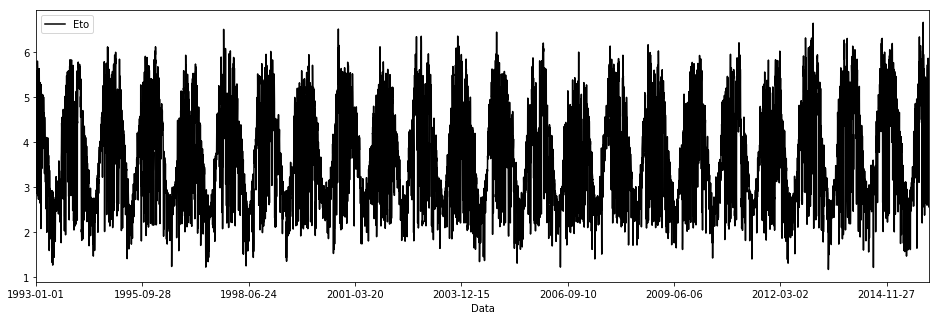

In [8]:
df = pd.DataFrame(eto,columns=['Eto'])
df.insert(0,'Data', dataset.loc[:,'Data'])
df.set_index('Data', inplace=True)
#df.index = df.index.to_datetime('"%y-%m-%d"')
df.plot(figsize=(16,5), color='k')